In [62]:
#importing world bank data from the lecture datahub
!pip install wbdata

import wbdata
import numpy as np

In [63]:
!pip install wbdata
import pandas as pd
import wbdata
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [64]:
#Population indicators
wbdata.get_indicator(source=40)

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.1014        Probability of dying among adolescents ages 10-14 years (per 1,000)
SH.DYN.1519        Probability of dying among adolescents ages 15-19 years (per 1,000)
SH.DYN.2024        Probability of dying among youth ages 20-24 years (per 1,000)

In [92]:
variable_labels = {"SP.POP.TOTL":"World Population"}

world = wbdata.get_dataframe(variable_labels, country="BRA")

world

,World Population
date,
2020,212559409.0
2019,211049519.0
2018,209469320.0
2017,207833825.0
2016,206163056.0
...,...
1964,81064572.0
1963,78772647.0
1962,76514329.0


In [185]:
#Function that returns the population of a given sex, year, and place of the people with the 
def population(sex, year, age_low, age_high, place):
    female_variables = {"SP.POP." + str(age_low)+str(age_high) + ".FE": sex}
    male_variables = {"SP.POP." + str(age_low) + str(age_high) + ".MA": sex}
    if sex == "Female" or sex == "female":
        variables = female_variables
    elif sex == "Male" or sex == "male":
        variables = male_variables
    population = wbdata.get_dataframe(variables, country=place)
    population = population.filter(like=str(year), axis=0)
    return population[sex][0]
    


In [203]:
def population_df_filter(df, sex):
    if sex == 'males':
        return df.drop(columns = ['Female'])
    elif sex == 'females':
        return df.drop(columns = ['Male'])
    else:
        total_pop = df["Female"] + df["Male"]
        df["Total"] = total_pop
    return df

In [307]:
def population(sex, year, age_low, age_high, place):
    df = population_df(place, year)
    if sex == 'males' or sex == 'male' or sex == 'Male' or sex == 'Males':
        #df[df.columns.drop(list(df.filter(regex='Females')))]
        df = df.loc[:, ~df.columns.str.contains("Females")]
    elif sex == 'females' or sex == 'female' or sex == 'Female' or sex == 'Females':
        #df[df.columns.drop(list(df.filter(regex='Males')))]
        df = df.loc[:, ~df.columns.str.contains("Males")]
    else:
        total_pop = df[df.filter(regex ='Females')] + df[df.filter(regex='Males')]
        df["Total"] = total_pop
    #cols = df.columns
    x = age_low
    y = age_high
    df = df.loc[:, df.columns.str.contains('x')]
    #df = df.loc[:, df.columns.str.contains('y')]
    #total = population_df.sum()[3]
  #  t = total.astype(int)
   # age_l = inputs[0][0:2]
    return df
 #   if sex == 'people':
  #      group = 'people'
   # else:
    #    group = sex
   # if year > 2021:
    #    print("By estimation, in {}, there will be {} {} aged {} to aged {} living in {}.".format(year, t, g, age_l, age_h, loc))
   # else:
    #    print("In {}, there are {} {} aged {} to aged {} living in {}.".format(year, t, g, age_l, age_h, loc))
    

In [308]:
population('female', [2020], 15, 19, "USA")

""
date
2020


In [187]:
population("Female", 2020,15,19,'USA')

10360836.0

In [188]:
us = population_df("USA", [2020])
us_1519 = us[['Males 15-19', 'Females 15-19']]
us_1519

,Males 15-19,Females 15-19
date,,
2020,10784617.0,10360836.0


In [239]:
#age range array
age_ranges = []
age_range_fct = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_range_fct.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append(f"{i:02d}"+"-"+f"{i+4:02d}")

age_range_fct.append("80UP")
age_ranges.append("80UP")
age_range_obj = zip(age_range_fct, age_ranges)

male_variables = {"SP.POP."+age+".MA":"Males "+age_range for age, age_range in age_range_obj}
age_range_obj = zip(age_range_fct, age_ranges)
female_variables = {"SP.POP."+age+".FE":"Females "+age_range for age, age_range in age_range_obj}

variables = male_variables
variables.update(female_variables)

print(variables)

{'SP.POP.0004.MA': 'Males 00-04', 'SP.POP.0509.MA': 'Males 05-09', 'SP.POP.1014.MA': 'Males 10-14', 'SP.POP.1519.MA': 'Males 15-19', 'SP.POP.2024.MA': 'Males 20-24', 'SP.POP.2529.MA': 'Males 25-29', 'SP.POP.3034.MA': 'Males 30-34', 'SP.POP.3539.MA': 'Males 35-39', 'SP.POP.4044.MA': 'Males 40-44', 'SP.POP.4549.MA': 'Males 45-49', 'SP.POP.5054.MA': 'Males 50-54', 'SP.POP.5559.MA': 'Males 55-59', 'SP.POP.6064.MA': 'Males 60-64', 'SP.POP.6569.MA': 'Males 65-69', 'SP.POP.7074.MA': 'Males 70-74', 'SP.POP.7579.MA': 'Males 75-79', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 00-04', 'SP.POP.0509.FE': 'Females 05-09', 'SP.POP.1014.FE': 'Females 10-14', 'SP.POP.1519.FE': 'Females 15-19', 'SP.POP.2024.FE': 'Females 20-24', 'SP.POP.2529.FE': 'Females 25-29', 'SP.POP.3034.FE': 'Females 30-34', 'SP.POP.3539.FE': 'Females 35-39', 'SP.POP.4044.FE': 'Females 40-44', 'SP.POP.4549.FE': 'Females 45-49', 'SP.POP.5054.FE': 'Females 50-54', 'SP.POP.5559.FE': 'Females 55-59', 'SP.POP.6064.FE': '

In [240]:
def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

In [241]:
# a function that takes a region and an array of year values and
# outputs a df by region/country and array of year(s) with columns being age/sex pairs

def population_df(place, years):
    df = fix_date_index(wbdata.get_dataframe(variables,country=place))
    df = df.loc[years,:]
    return df

population_df("USA", np.arange(1960,2021,10))

,Males 00-04,Males 05-09,Males 10-14,Males 15-19,Males 20-24,Males 25-29,Males 30-34,Males 35-39,Males 40-44,Males 45-49,...,Females 35-39,Females 40-44,Females 45-49,Females 50-54,Females 55-59,Females 60-64,Females 65-69,Females 70-74,Females 75-79,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
1960,10238685.0,9525497.0,8548461.0,6731386.0,5555263.0,5563060.0,5983064.0,6195714.0,5752925.0,5383625.0,...,6256241.0,5832191.0,5515471.0,5120806.0,4665114.0,3883519.0,3285269.0,2513932.0,1815555.0,1514744.0
1970,8810550.0,10154354.0,10518780.0,9685793.0,8065620.0,6942535.0,5957979.0,5685075.0,6017907.0,6091605.0,...,5585707.0,6047968.0,6211692.0,5685003.0,5254676.0,4743071.0,4097167.0,3155928.0,2356832.0,2398900.0
1980,8463762.0,8605060.0,9597375.0,10877439.0,10822343.0,9899963.0,8708101.0,6716734.0,5868372.0,5364274.0,...,7076894.0,5925136.0,5632004.0,6012735.0,6053367.0,5390326.0,4823115.0,4086358.0,3106344.0,3534692.0
1990,9745181.0,9120701.0,8814991.0,9130866.0,9935496.0,10838358.0,11030619.0,10018235.0,8680714.0,6625047.0,...,10047235.0,8953815.0,7015816.0,5824932.0,5424260.0,5645090.0,5498416.0,4596529.0,3690326.0,4947858.0
2000,10016933.0,10688613.0,10624729.0,10240027.0,9721455.0,9777597.0,10534160.0,11466430.0,11231294.0,10054003.0,...,11144825.0,11205597.0,10229800.0,8973790.0,6955397.0,5652813.0,5079452.0,4910435.0,4332662.0,6064574.0
2010,10692928.0,10571672.0,10702971.0,11409037.0,11117337.0,10492057.0,9947267.0,9983665.0,10571911.0,11286494.0,...,10023105.0,10379380.0,11185539.0,11187304.0,10106492.0,8687658.0,6543616.0,5017592.0,4097423.0,7105337.0
2020,10008934.0,10199386.0,10728070.0,10784617.0,11270787.0,12088740.0,11648827.0,10809054.0,10072161.0,9923364.0,...,10707571.0,10129333.0,10038434.0,10211211.0,10790474.0,10570540.0,9310841.0,7673976.0,5375971.0,7863732.0


In [100]:
arg = population_df("ARG", [2020])
arg['Males 15-19']

date
2020    1806967.0
Name: Males 15-19, dtype: float64

In [101]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

def pop_pyramid(place, year):
    df = population_df(place, year).sum(axis=0)
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    year = year

    bins = [go.Bar(x = df.filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='purple'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
    return py.iplot(dict(data=bins, layout=layout))

pop_pyramid('USA', [2018])

In [102]:
#import plotly.offline as py
#import plotly.graph_objs as go
#import pandas as pd
#import numpy as np

#def animated_pop_pyramid(place, year):
#    df = population_df(place, year)
    # Count down by increments of 20 years
    
#    layout = go.Layout(barmode='overlay',
#                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
#                   xaxis=go.layout.XAxis(title='Number'))
# This makes a list of graphs, year by year
#    bins = [go.Bar(x = df.filter(regex="Male").values,
#               y = [int(s[:2])+1 for s in age_ranges],
#               orientation='h',
#               name='Men {:d}'.format(i),
#               hoverinfo='skip'
#              )
#        for i in year]
#          
#    bins += [go.Bar(x = -df.filter(regex="Female").values,
#                y=[int(s[:2])+1 for s in age_ranges],
#                orientation='h',
#                name='Women {:d}'.format(i),
#                hoverinfo='skip',
#               )
#         for i in year]

 #return py.iplot(dict(data=bins, layout=layout))
#    return df
#animated_pop_pyramid("CHN", [1960,1980])

In [103]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

def animated_pop_pyramid(place, year):
    years = year
    
    df = wbdata.get_dataframe(variables,country=place)
    #df = df.loc[years,:]
    
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    # This makes a list of graphs, year by year
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]

    bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_ranges],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip',
                   )
             for year in years]

    py.iplot(dict(data=bins, layout=layout))
    
    
animated_pop_pyramid('USA', np.arange(2020, 1959, -20))

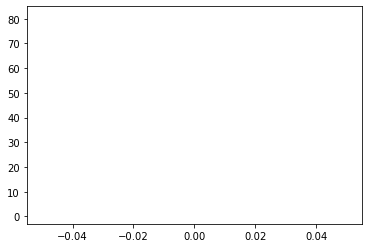

In [104]:
import time
import matplotlib.pyplot as plt
def animated_pop_pyramid(place, year):
    years = year
    
    df = wbdata.get_dataframe(variables,country=place)
    layout = go.Layout(barmode='overlay',
                       yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                       xaxis=go.layout.XAxis(title='Number'))
    
    plt.ion
    fig = plt.figure()

    for yeari in years:
        #df = df.loc[years,:]

        # This makes a list of graphs, year by year
       # bins = [go.Bar(x = df.loc[str(yeari),:].filter(regex="Male").values,
        #               y = [int(s[:2])+1 for s in age_ranges],
         #              orientation='h',
          #             name='Men {:d}'.format(yeari),
           #            hoverinfo='skip'
            #          )]

      #  bins += [go.Bar(x = -df.loc[str(yeari),:].filter(regex="Female").values,
       #                 y=[int(s[:2])+1 for s in age_ranges],
        #                orientation='h',
         #               name='Women {:d}'.format(yeari),
          #              hoverinfo='skip',
           #            )]
        counts = df.loc[str(yeari),:].filter(regex="Male").values
     #   x += -df.loc[str(yeari),:].filter(regex="Female").values
        bins = [int(s[:2])+1 for s in age_ranges]
        x = []
 #       for count in counts:
     #       num = np.arange(0, count, 1)
  #          for k in num:
   #             for j in bins:
    #                x = np.append(x, j)
       # bins +=[int(s[:2])+1 for s in age_ranges]
        
   #     figure = py.iplot(dict(data=bins, layout=layout))
        plt.hist(x= x, bins = bins, density = False, orientation = 'horizontal')
     #   fig.canvas.draw()
      #  fig.canvas.flush_events()
        #time.sleep(1)
        


        
#plot
    
    
animated_pop_pyramid('USA', np.arange(2020, 1959, -20))

In [105]:
population('Male', 2020, 10,14,'USA')

,Male
date,
2020,10264666.0


In [108]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import time

def animated_pop_pyramid(place, year):
    years = year
    
    df = wbdata.get_dataframe(variables,country=place)
    #df = df.loc[years,:]
    
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    # This makes a list of graphs, year by year
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]

    bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_ranges],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip',
                   )
             for year in years]


    for i in bins:
        py.iplot(dict(data=i, layout=layout))
        time.sleep(2)
    
animated_pop_pyramid('USA', np.arange(2020, 1959, -20))

In [309]:
import time
import matplotlib.pyplot as plt
#import plotly
def animated_pop_pyramid(place, year):
    years = year
    
    #figure1 = plotly.tools.make_subplots(rows=1, cols=len(years))
    
    df = wbdata.get_dataframe(variables,country=place)
    layout = go.Layout(barmode='overlay',
                       yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                       xaxis=go.layout.XAxis(title='Number'))
    

    
    for yeari in years:

        # This makes a list of graphs, year by year
        bins = [go.Bar(x = df.loc[str(yeari),:].filter(regex="Male").values,
                        y = [int(s[:2])+1 for s in age_ranges],
                       orientation='h',
                       name='Men {:d}'.format(yeari),
                       hoverinfo='skip'
                      )]

        bins += [go.Bar(x = -df.loc[str(yeari),:].filter(regex="Female").values,
                        y=[int(s[:2])+1 for s in age_ranges],
                        orientation='h',
                        name='Women {:d}'.format(yeari),
                        hoverinfo='skip',
                       )]

        
        #figure1.append_trace(bins, 1, yeari)
        
        figure = py.iplot(dict(data=bins, layout=layout))
        
        time.sleep(1)
        
        #py.iplot(figure1)
        


        
#plot
    
    
animated_pop_pyramid('USA', np.arange(2020, 1959, -20))